In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tme3 import *
from mltools import plot_data, plot_frontiere, make_grid, gen_arti

In [7]:
check_fonctions()

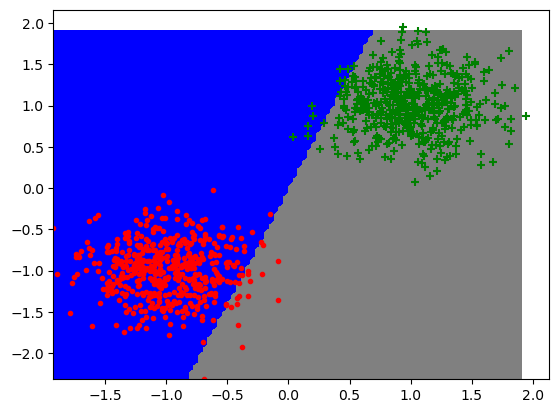

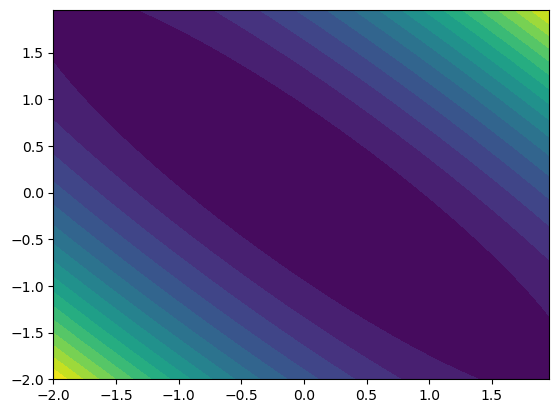

In [8]:
if __name__ == "__main__":
    ## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
    datax, datay = gen_arti(epsilon=0.1)
    ## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
    grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

    plt.figure()
    ## Visualisation des données et de la frontière de décision pour un vecteur de poids w
    w = np.random.randn(datax.shape[1], 1)
    plot_frontiere(datax, lambda x: np.sign(x.dot(w)), step=100)
    plot_data(datax, datay)

    ## Visualisation de la fonction de coût en 2D
    plt.figure()
    plt.contourf(
        x_grid,
        y_grid,
        np.array([mse(w, datax, datay).mean() for w in grid]).reshape(x_grid.shape),
        levels=20,
    )


In [9]:
print(datax.shape, datay.shape)

(1000, 2) (1000, 1)


In [21]:
xx = np.hstack((datax, datax + 2))
print(xx.shape)
w = np.random.randn(xx.shape[1], 1)
print(w.shape)

(1000, 4)
(4, 1)


In [26]:
reglog_grad(w, xx, datay).shape

(1000, 4)

In [27]:
datay.reshape(-1, 1).shape

(1000, 1)

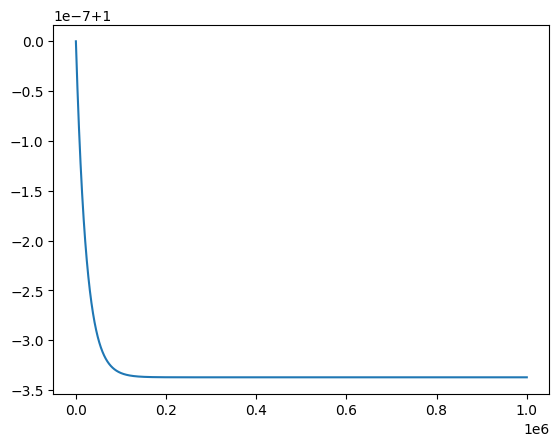

In [101]:
w, liste_w, losses = descente_gradient(datax, datay, mse, mse_grad, 1e-5, 1000000)
plt.plot(losses)

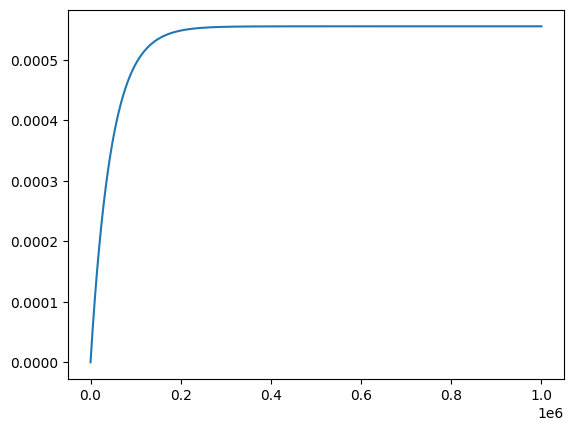

In [102]:
plt.plot(liste_w)

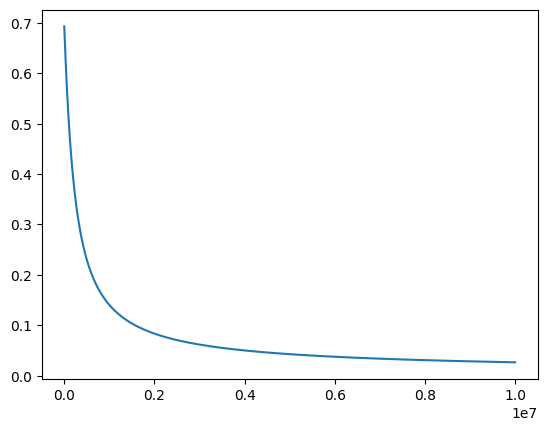

In [121]:
w, liste_w, losses = descente_gradient(datax, datay, reglog, reglog_grad, 1e-5, 10000000)
plt.plot(losses)